# Analyzing and Modeling Sudent Performance
## [Click for the dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from keras import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.losses import MeanSquaredError
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

C:\Users\RaDmAn2222\AppData\Local\Temp\ipykernel_15536\2910232965.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("C:\\Users\\RaDmAn2222\\Desktop\\datasets\\Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
#dropping the unnecessary column
data.drop("StudentID", inplace=True, axis=1)
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Ploting the datas for a better understanding and finding the correlation

c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\

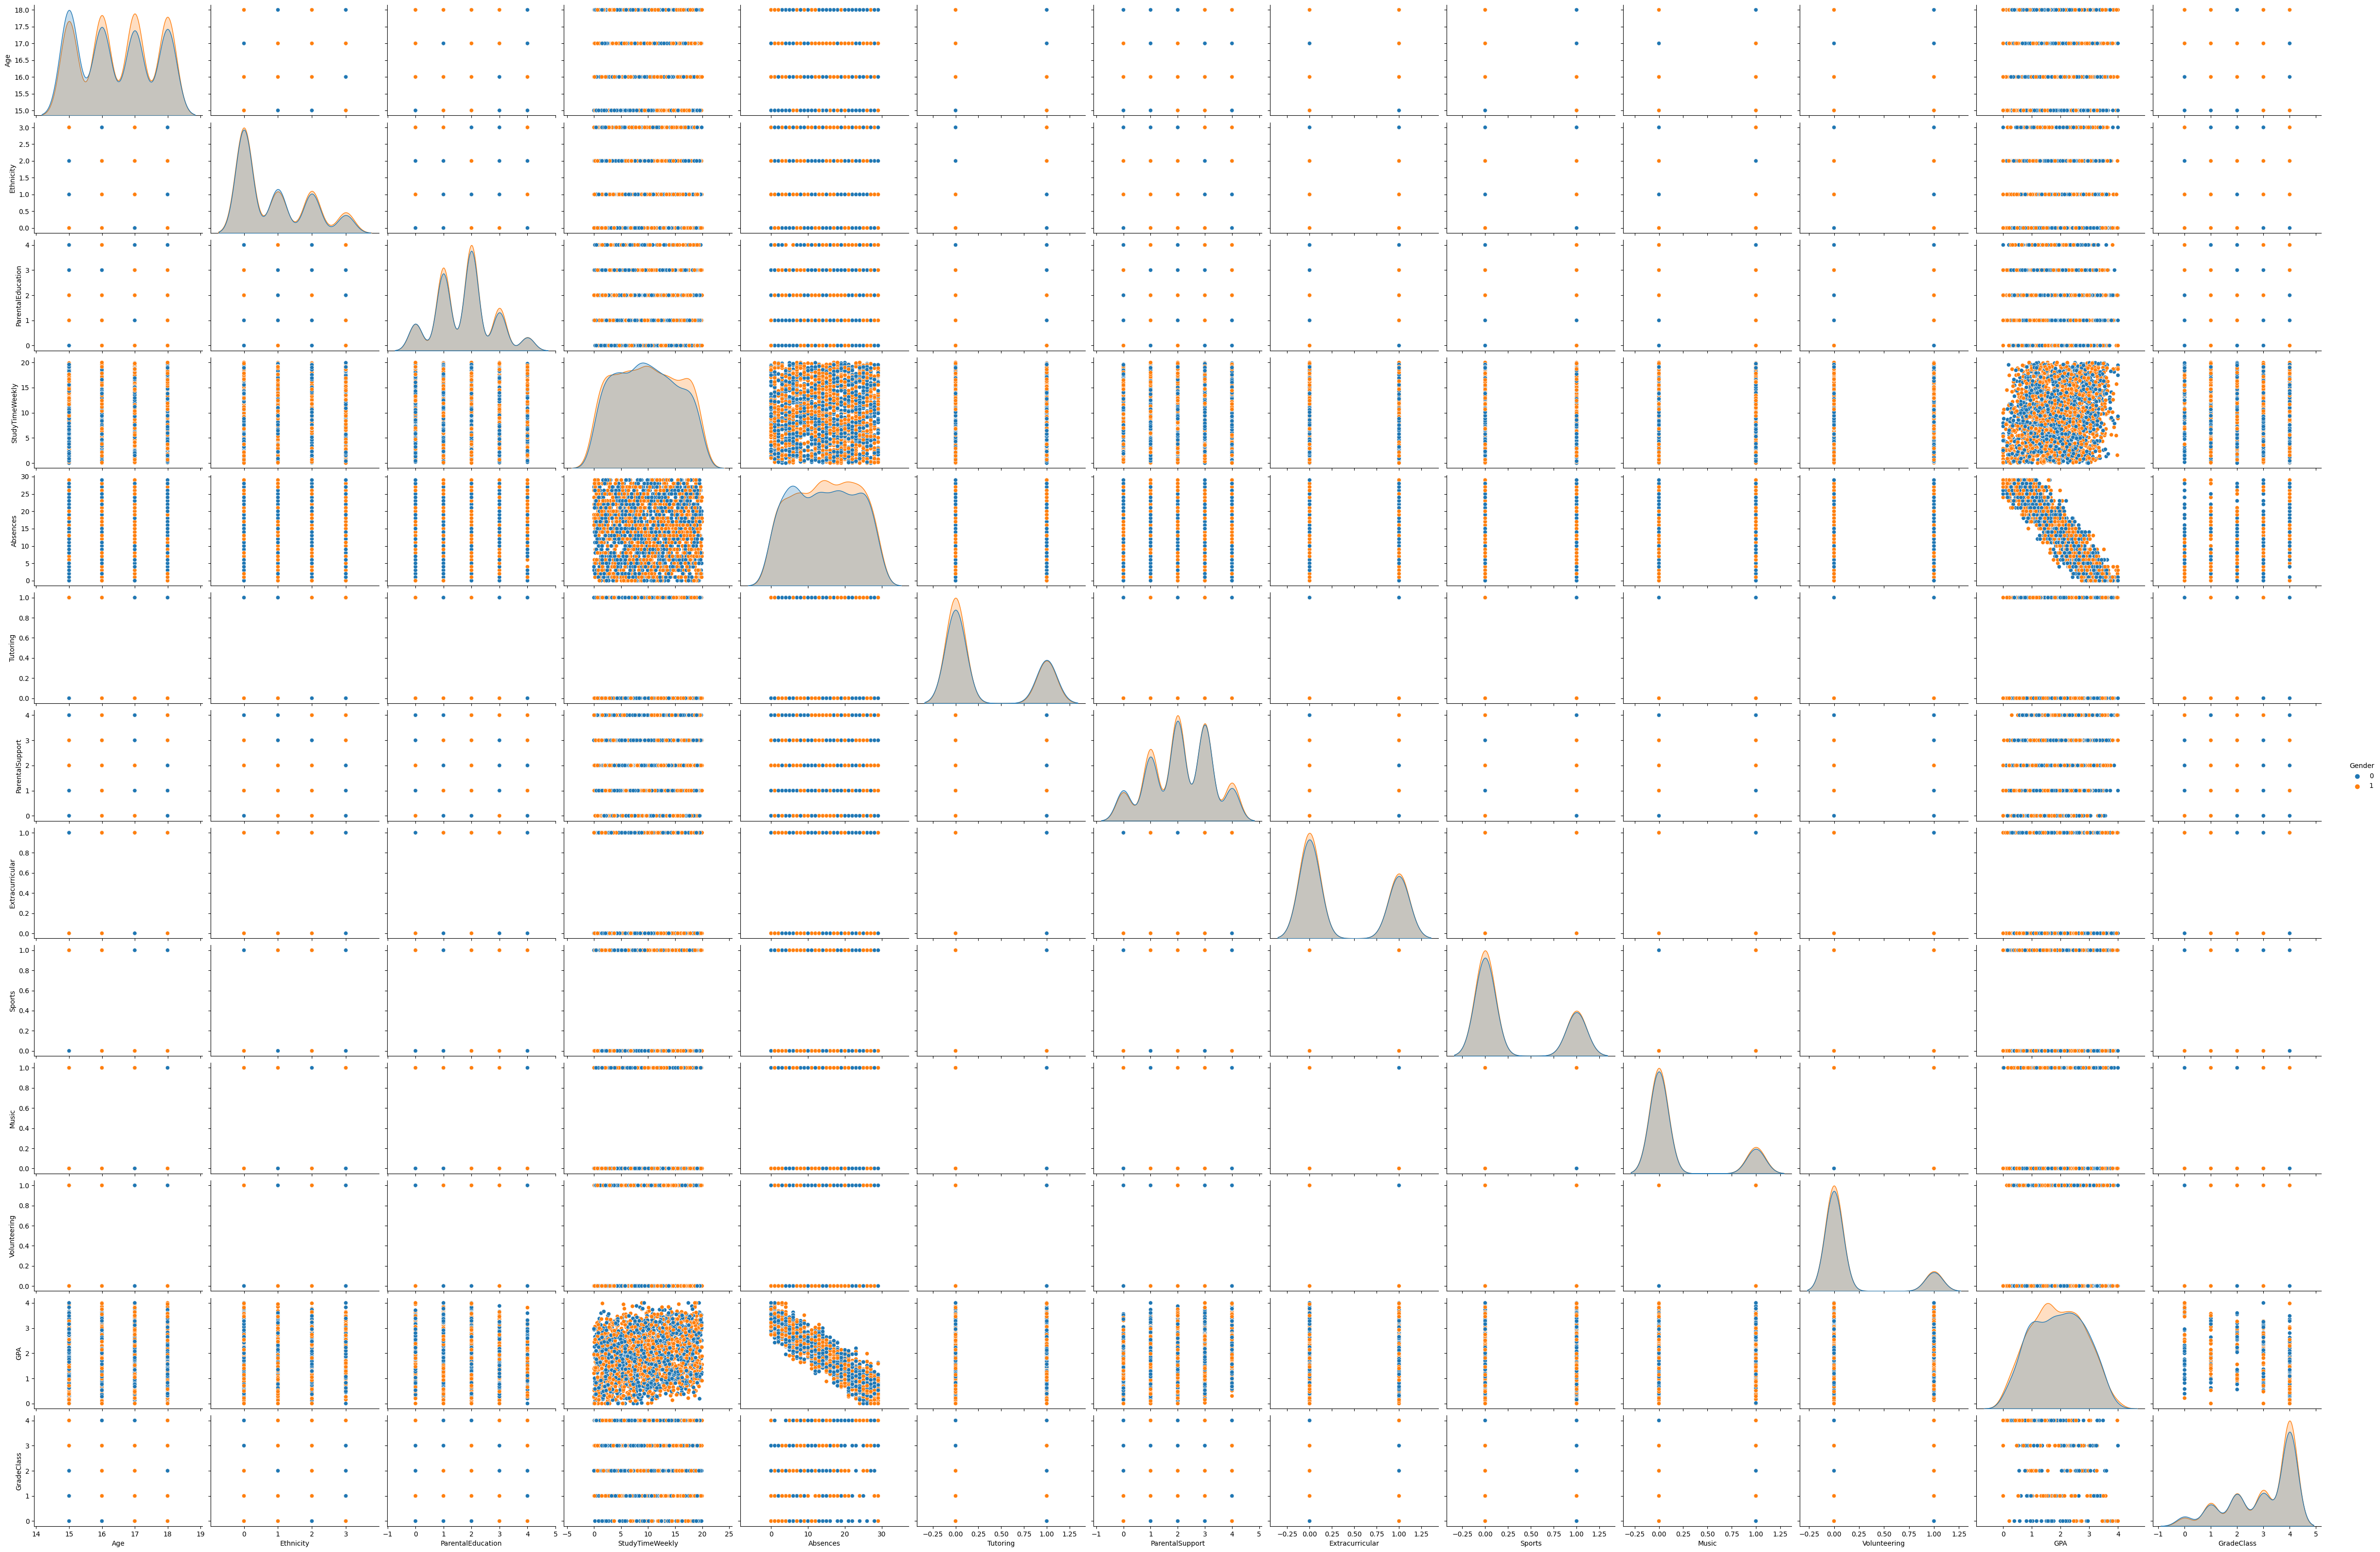

In [6]:
sns.pairplot(data, hue="Gender", aspect=1.5)
plt.show()

In [7]:
#scacling the datas
scaler = StandardScaler()

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X = scaler.fit_transform(X)
X

array([[ 0.47291901,  0.97849211, -0.85339088, ...,  2.01954358,
        -0.43186565,  1.11808631],
       [ 1.36294441, -1.02198065, -0.85339088, ..., -0.49516139,
        -0.43186565,  1.24237446],
       [-1.30713178, -1.02198065,  1.09164102, ..., -0.49516139,
        -0.43186565, -1.96027719],
       ...,
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -0.83484487],
       [-0.41710638,  0.97849211,  0.11912507, ...,  2.01954358,
        -0.43186565, -0.11245195],
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495,  0.25555918]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using Random Forest to get the most important features

In [9]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) ---> %s" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))

Feature ranking:
1. feature 12 (0.553729) ---> GPA
2. feature 5 (0.363105) ---> Absences
3. feature 4 (0.027684) ---> StudyTimeWeekly
4. feature 7 (0.014127) ---> ParentalSupport
5. feature 6 (0.007333) ---> Tutoring
6. feature 3 (0.006408) ---> ParentalEducation
7. feature 2 (0.006014) ---> Ethnicity
8. feature 0 (0.005155) ---> Age
9. feature 10 (0.004358) ---> Music
10. feature 9 (0.003692) ---> Sports
11. feature 8 (0.003545) ---> Extracurricular
12. feature 1 (0.002470) ---> Gender
13. feature 11 (0.002381) ---> Volunteering


### In the previous image we saw that gender is not really important and we also omit other less important features

In [10]:
columns = ['Music', 'Sports', 'Extracurricular', 'Gender', 'Volunteering']
data = data.drop(columns=columns, axis=1)

In [11]:
#scaling and spliting the datas again
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using different algorithms to see which one works better

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

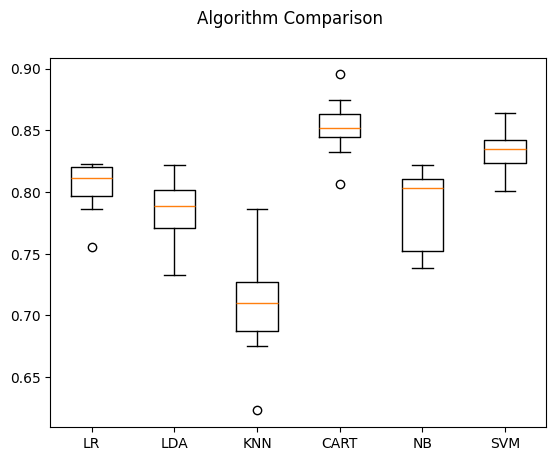

In [13]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.67014614, 0.60334029, 0.68475992, 0.70981211, 0.70146138,
       0.70981211, 0.70981211, 0.69728601, 0.70981211])

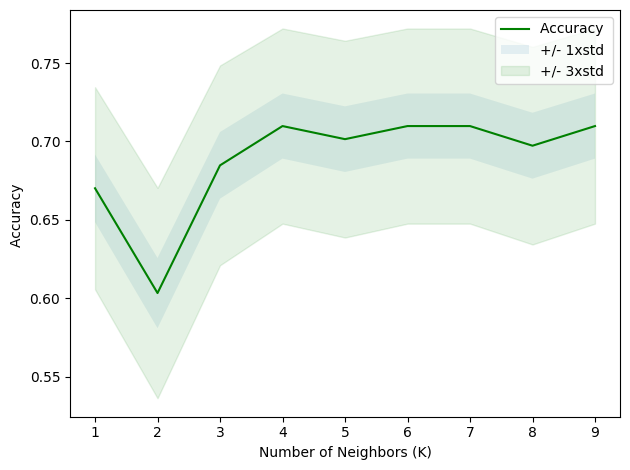

In [15]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [17]:
yhat = knn.predict(X_test)
yhat

array([4., 2., 3., 1., 4., 3., 3., 3., 3., 4., 3., 4., 1., 2., 2., 4., 4.,
       4., 3., 3., 3., 4., 4., 2., 4., 4., 4., 2., 3., 3., 4., 4., 3., 1.,
       4., 3., 1., 1., 0., 4., 2., 1., 4., 3., 4., 2., 2., 4., 2., 4., 1.,
       2., 4., 4., 3., 1., 3., 1., 4., 3., 4., 3., 2., 4., 4., 3., 1., 3.,
       4., 1., 1., 4., 2., 2., 4., 1., 3., 4., 4., 4., 3., 1., 3., 4., 4.,
       4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 2., 4.,
       4., 4., 1., 1., 4., 4., 4., 1., 4., 3., 2., 4., 1., 0., 4., 4., 4.,
       2., 4., 4., 4., 3., 4., 1., 4., 2., 4., 4., 0., 1., 4., 0., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 2., 1.,
       4., 2., 2., 4., 4., 2., 3., 4., 2., 4., 1., 3., 4., 2., 2., 2., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 2., 2., 2., 4., 2., 4., 4.,
       2., 3., 4., 2., 2., 4., 4., 4., 3., 2., 2., 4., 2., 1., 4., 1., 4.,
       2., 2., 4., 4., 4.

In [18]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.8196549921589127
test accuracy is: 0.7098121085594989


In [19]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
tree # it shows the default parameters

DecisionTreeClassifier(max_depth=4)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [21]:
yhat = tree.predict(X_test)

In [22]:
print('train accuracy is:', metrics.accuracy_score(y_train, tree.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9336121275483533
test accuracy is: 0.9144050104384134


In [23]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
yhat = rfc.predict(X_test)

print('train accuracy is:', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9027705175117616
test accuracy is: 0.8914405010438413


In [24]:
#using a voting classifier
RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
Tree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
voting_clf = VotingClassifier(
 estimators=[('rf', RF), ('tree', Tree)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=42)),
                             ('tree', DecisionTreeClassifier(max_depth=4))])

In [25]:
for clf in (RF, Tree, voting_clf):
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(clf.__class__.__name__, metrics.accuracy_score(y_test, yhat))

RandomForestClassifier 0.8914405010438413
DecisionTreeClassifier 0.9164926931106472
VotingClassifier 0.9164926931106472


In [26]:
yhat = voting_clf.predict(X_test)

print('train accuracy is:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9336121275483533
test accuracy is: 0.9164926931106472


### Trying to make a neural network to achieve a better accuracy

In [27]:
model = Sequential([
    Dense(units=80, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=5, activation='softmax')
])

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=75)

Epoch 1/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2657 - loss: 1.6100   
Epoch 2/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6266 - loss: 1.4899
Epoch 3/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7729 - loss: 1.0539
Epoch 4/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8102 - loss: 0.7072 
Epoch 5/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8538 - loss: 0.5800
Epoch 6/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8477 - loss: 0.5897
Epoch 7/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8663 - loss: 0.5361
Epoch 8/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.5471
Epoch 9/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8586 - loss: 0.5537
Epoch 10/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8625 - loss: 0.5809
Epoch 11/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8953 - loss: 0.4817
Epoch 12/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

In [28]:
yhat = model.predict(X_test)
yhat_class = np.argmax(yhat, axis=1)
yhat_class

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([4, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 4, 1, 3, 2, 4, 4, 4, 3, 3, 4, 4,
       4, 1, 4, 4, 4, 1, 3, 3, 4, 4, 2, 0, 4, 4, 1, 2, 1, 4, 2, 0, 4, 3,
       4, 3, 2, 4, 2, 4, 1, 1, 4, 4, 4, 1, 3, 1, 4, 4, 4, 3, 2, 4, 4, 4,
       1, 3, 4, 1, 0, 4, 2, 2, 4, 2, 3, 3, 4, 4, 3, 1, 3, 4, 4, 4, 0, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4,
       4, 3, 0, 4, 4, 4, 3, 1, 4, 3, 4, 1, 0, 4, 4, 4, 2, 4, 3, 2, 4, 0,
       2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 1, 4, 1, 4, 4, 2, 1, 4, 1, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 1, 1, 4, 4, 2,
       3, 4, 3, 4, 2, 3, 4, 2, 2, 2, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3,
       2, 3, 4, 1, 4, 3, 2, 3, 4, 1, 3, 4, 4, 4, 4, 2, 3, 4, 2, 1, 4, 2,
       4, 2, 0, 4, 4, 4, 1, 2, 4, 3, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 0, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 1, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4,
       4, 1, 3, 4, 2, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 3, 4, 1, 3,
       4, 4, 4, 4, 0, 4, 2, 4, 2, 4, 1, 4, 4, 1, 2,

In [29]:
print('test accuracy is:', metrics.accuracy_score(y_test, yhat_class))

test accuracy is: 0.860125260960334


### Using a voting classifier with neural network to reach the best accuracy!

In [30]:
RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
Tree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
neural_network = KerasClassifier(build_fn=model, epochs=75)
voting_clf = VotingClassifier(
 estimators=[('rf', RF), ('tree', Tree), ('nn', neural_network)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

Epoch 1/75


c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9289 - loss: 0.2707
Epoch 2/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9256 - loss: 0.2808
Epoch 3/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9374 - loss: 0.2396
Epoch 4/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.2281
Epoch 5/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.9439 - loss: 0.2292
Epoch 6/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9265 - loss: 0.2568
Epoch 7/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9302 - loss: 0.2707
Epoch 8/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9323 - loss: 0.2440
Epoch 9/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.9253 - loss: 0.2727
Epoch 10/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9431 - loss: 0.2341
Epoch 11/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9408 - loss: 0.2258
Epoch 12/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9480

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=42)),
                             ('tree', DecisionTreeClassifier(max_depth=4)),
                             ('nn',
                              KerasClassifier(build_fn=<Sequential name=sequential, built=True>, epochs=75))])

In [31]:
for clf in (RF, Tree, voting_clf):
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(clf.__class__.__name__, metrics.accuracy_score(y_test, yhat))

RandomForestClassifier 0.8914405010438413
DecisionTreeClassifier 0.9144050104384134
Epoch 1/75


c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2506
Epoch 2/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9296 - loss: 0.2475
Epoch 3/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9382 - loss: 0.2524
Epoch 4/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9340 - loss: 0.2508
Epoch 5/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9257 - loss: 0.2714
Epoch 6/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9354 - loss: 0.2454
Epoch 7/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9317 - loss: 0.2642
Epoch 8/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.2849
Epoch 9/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9491 - loss: 0.2070
Epoch 10/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9385 - loss: 0.2276
Epoch 11/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9412 - loss: 0.2327
Epoch 12/75
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9284 -

In [32]:
yhat = voting_clf.predict(X_test)

print('train accuracy is:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
train accuracy is: 0.9330893883951908
test accuracy is: 0.9123173277661796
